# Resummino

This a simple example on using resummino through hepi.


For more advanced usages like

  * pdf and scale uncertainty compuations
  * exporting data as json
  * distributing scans to clusters
  
check the (less polished codes) in the `debug` or `distribute` folder in the source code repository

In [1]:
import hepi
print(hepi.__version__)
import smpl
import numpy as np
import hepi.util as util
import matplotlib.pyplot as plt
from hepi.run import resummino as rs
# set the folder where the resummino binary can be found either in either ./{,bin,bin/build}/resummino
rs.set_path("resummino")
# By default hepi will run with nice -n5 to prevent overloading the system if more scans than cores are running
#rs.set_pre("") disables any prefixing with nice
print (rs.get_path())

0.2.9.7
~/git/resummino_releases/


## aNNLO+NNLL for weakino pair, slepton pair, Z'/W'->leptons,

/home/apn/data/de.neuwirthinformatik.Alexander/Development/git/hepi/hepi/util.py:101: UserWarning: LHAPDF python binding not installed? Make sure you set PYTHONPATH correctly (i.e. correct python version) if you want to compute PDF uncertainties.
  warnings.warn(


QUEUEING TASKS | Checking input:   0%|          | 0/15 [00:00<?, ?it/s]

PROCESSING TASKS | Checking input:   0%|          | 0/15 [00:00<?, ?it/s]

COLLECTING RESULTS | Checking input:   0%|          | 0/15 [00:00<?, ?it/s]

QUEUEING TASKS | Preparing:   0%|          | 0/15 [00:00<?, ?it/s]

PROCESSING TASKS | Preparing:   0%|          | 0/15 [00:00<?, ?it/s]

COLLECTING RESULTS | Preparing:   0%|          | 0/15 [00:00<?, ?it/s]

Skipped: 15 Not skipped: 0


QUEUEING TASKS | Running: 0it [00:00, ?it/s]

PROCESSING TASKS | Running: 0it [00:00, ?it/s]

COLLECTING RESULTS | Running: 0it [00:00, ?it/s]

QUEUEING TASKS | Parsing:   0%|          | 0/15 [00:00<?, ?it/s]

PROCESSING TASKS | Parsing:   0%|          | 0/15 [00:00<?, ?it/s]

COLLECTING RESULTS | Parsing:   0%|          | 0/15 [00:00<?, ?it/s]

CPU times: user 4.96 s, sys: 103 ms, total: 5.06 s
Wall time: 5.07 s


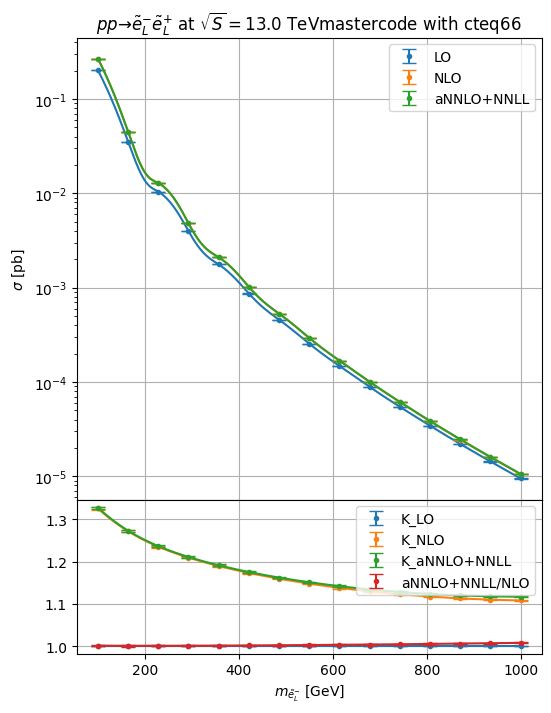

In [2]:
%%time
params = [
    "mastercode_with_gm2.in", # baseline slha file in the relative ./output folder by default unless set_output_dir was used 
]
pss = [    
      (1000011,-1000011), # Final state particles for resummino to run
     ]

for pa,pb in pss:
    for param in params:
        # All the inputs Order, CMS in GeV, particle 1, particle 2, slha, pdf_lo, pdf_nlo,mu_f, mu_r
        i = hepi.Input(hepi.Order.aNNLO_PLUS_NNLL,13000,pa,pb,param,"cteq6l1","cteq66",1., 1.)
        li = [i] # li is our list of inputs that we want resummino to run
        li = hepi.mass_scan([i],pa, np.linspace(100,1000,7+8)) # we scan the slepton mass from 100 to 1000 at 15 equidistant points  
        rs_dl = rs.run(li,skip=True) # run resummino, skipping if the result already exists.
        # rs_dl is a panda table(dataframe) with all inputs and result 
        _,axs = hepi.init_double_plot()
        # hepi has some useful plotting routines, but the results from rs_dl can easily be accessed
        # Now plot the mass of PDG id pa from the results at LO ,NLO and aNNLO+NLL
        hepi.mass_plot(rs_dl,["LO","NLO","aNNLO_PLUS_NNLL"],pa,axes=axs[0],tight=False)
        # Plot K factors vs LO and aNNLO+NLL/NLO
        hepi.mass_plot(rs_dl,["K_LO","K_NLO","K_aNNLO_PLUS_NNLL","aNNLO_PLUS_NNLL_OVER_NLO"],pa, yaxis=None, axes=axs[1],logy=False,tight=False)
        # construct a title from the inputs
        hepi.title(li[0],axs[0],scenario="mastercode")

## NLO+NLL for squark/gluino+weakino

QUEUEING TASKS | Checking input:   0%|          | 0/15 [00:00<?, ?it/s]

PROCESSING TASKS | Checking input:   0%|          | 0/15 [00:00<?, ?it/s]

COLLECTING RESULTS | Checking input:   0%|          | 0/15 [00:00<?, ?it/s]

QUEUEING TASKS | Preparing:   0%|          | 0/15 [00:00<?, ?it/s]

PROCESSING TASKS | Preparing:   0%|          | 0/15 [00:00<?, ?it/s]

COLLECTING RESULTS | Preparing:   0%|          | 0/15 [00:00<?, ?it/s]

Skipped: 15 Not skipped: 0


QUEUEING TASKS | Running: 0it [00:00, ?it/s]

PROCESSING TASKS | Running: 0it [00:00, ?it/s]

COLLECTING RESULTS | Running: 0it [00:00, ?it/s]

QUEUEING TASKS | Parsing:   0%|          | 0/15 [00:00<?, ?it/s]

PROCESSING TASKS | Parsing:   0%|          | 0/15 [00:00<?, ?it/s]

COLLECTING RESULTS | Parsing:   0%|          | 0/15 [00:00<?, ?it/s]

CPU times: user 4.15 s, sys: 107 ms, total: 4.26 s
Wall time: 4.26 s


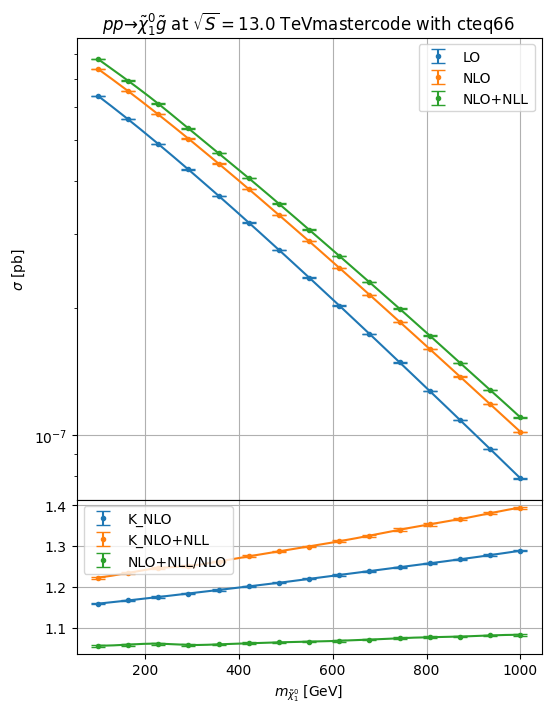

In [6]:
%%time
params = [
    "mastercode_with_gm2.in",
]
pss = [    
      (1000022,1000021),
     ]
for pa,pb in pss:
    for param in params:
        # For this demo we reduce the number of iterations to 5, but 50 is recommended, also precision of permille 0.001 is recommended
        i = hepi.Input(hepi.Order.NLO_PLUS_NLL,13000,pa,pb,param,"cteq6l1","cteq66",1., 1.,precision=0.01,max_iters=5)
        li = [i]
        li = hepi.mass_scan([i],pa, np.linspace(100,1000,7+8))
        rs_dl = rs.run(li,skip=True)
        
        _,axs = hepi.init_double_plot()
        hepi.mass_plot(rs_dl,["LO","NLO","NLO_PLUS_NLL"],pa, axes=axs[0],tight=False)
        hepi.mass_plot(rs_dl,["K_NLO","K_NLO_PLUS_NLL","NLO_PLUS_NLL_OVER_NLO"],pa,yaxis=None, axes=axs[1],logy=False,tight=False)
        hepi.title(li[0],axs[0],scenario="mastercode")